### Student Information
Name: 戴強麟 Chiang-Lin Tai

Student ID: 108061531

GitHub ID: 2084793
https://github.com/TaiChiangLin/DM19-Lab1-Homework1

---

### Instructions

1. First: do the **take home** exercises in the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 29th 11:59 pm, Tuesday)__. 

# First Part 

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [1]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)
import nltk
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [2]:
#Answer here
X.where(X.category == 2)

,text,category,category_name
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2.0,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2.0,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2.0,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2.0,sci.med


In [3]:
X.query('(category == 2)')

,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med
16,"From: texx@ossi.com (Robert ""Texx"" Woodworth) ...",2,sci.med
28,From: rind@enterprise.bih.harvard.edu (David R...,2,sci.med
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [4]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [5]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [6]:
# Answer here
print(np.nan == 'NaN')
print(np.nan == 'None')
print(np.nan == '')

False
False
False


comment :

np.nan and None means nothing.

'NaN' and 'None' and  ""  are strings.

`.isnull()`  only works when the data type is nothing.

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [7]:
# Answer here
X[:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


Comment : DataFrame can easily add or delete the columns.

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

In [8]:
# Answer here
X_sample = X.sample(n=1000) #random state
a = list(X.category_name.value_counts())
b = list(X_sample.category_name.value_counts())
index = ['soc.religion.christian', 'sci.med', 'comp.graphics',
          'alt.atheism']
df = pd.DataFrame({'category_name1': a,
                    'category_name2': b}, index=index)
ax = df.plot.bar(title = 'Category distribution', ylim = [0, 700]
                 ,rot=0, fontsize = 12, figsize = (8,3))

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [10]:
# Answer here
[ count_vect.get_feature_names()[i] for i in range(len(X_counts[4, 0:100].toarray()[0])) 
                                                         if X_counts[4, 0:100].toarray()[0][i] != 0]

['00', '01']

In [11]:
count_vect.get_feature_names()[37]

'01'

In [12]:
count_vect.get_feature_names()[0]

'00'

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [13]:
import scipy as sp
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
# ngram_range=(min, max), default: 1-gram => (1, 1)
count = CountVectorizer(ngram_range=(1, 1))

count.fit(X.text)
BoW = count.vocabulary_
print('[amazon top 10 highest term frequency]\n')
for key in sorted(list(BoW.keys()),key = lambda i:BoW[i], reverse=True)[:10]:
    print('%s %d' % (key, BoW[key]))

[amazon top 10 highest term frequency]

íålittin 35787
ªl 35786
zzz 35785
zz 35784
zyxel 35783
zyklon 35782
zyeh 35781
zwart 35780
zvonko 35779
zvi 35778


In [14]:
candidate = []
frequency = []
for key in sorted(list(BoW.keys()),key = lambda i:BoW[i], reverse=True)[:100]:     
    candidate.append(key)
    frequency.append(BoW[key])

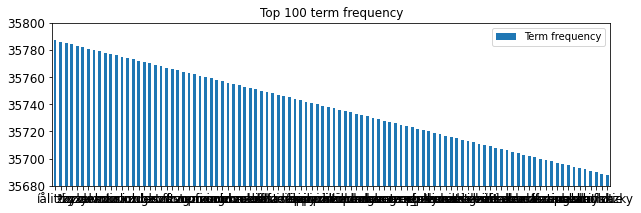

In [15]:
# Answer here
df = pd.DataFrame(frequency, columns = ["Term frequency"], index = candidate)
ax = df.plot.bar(title = 'Top 100 term frequency', ylim = [35680, 35800]
                 ,rot=0, fontsize = 12, figsize = (10,3))

Comment : I decide to use bar plot to demonstrate the top 100 words with the highest term frequency. 

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [16]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

In [17]:
# Answer here
from mpl_toolkits.mplot3d import Axes3D

X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

col = ['coral', 'blue', 'black', 'm']

# plot
#fig = plt.figure(figsize = (25,10))
#ax = fig.subplots()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_ylabel('\nZ Label')

plt.show()

NameError: name 'plt' is not defined

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [242]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [249]:
# Answer here
import plotly.express as px

fig = px.line(x=[i for i in range(len(term_frequencies))], y=[list(i)[0] for i in term_frequencies], labels={'x':'word', 'y':'term_frequencies'})
fig.show()


### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

In [251]:
candidate = []
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    if sum(X_counts[:,j].toarray()) > 1000:
        candidate.append(count_vect.get_feature_names()[j])
        term_frequencies.append(sum(X_counts[:,j].toarray()))

In [253]:
# Answer here
import plotly.express as px

fig = px.line(x=candidate, y=[list(i)[0] for i in term_frequencies], labels={'x':'word', 'y':'term_frequencies > 1k'})
fig.show()

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

In [259]:
match = [(a,b[0]) for (a,b) in zip(candidate,term_frequencies)]
match = sorted(match, key = lambda i:i[1], reverse = True)

In [261]:
# Answer here
import plotly.express as px

candidate2 = [word for (word,_) in match]
term_frequencies2 = [frequency for (_,frequency) in match]

fig = px.line(x=candidate2, y=term_frequencies2, labels={'x':'word', 'y':'term_frequencies > 1k'})
fig.show()

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [262]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
mlb.classes_
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()

In [263]:
# Answer here
X[0:9]

,text,category,category_name,unigrams,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 0, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 0, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 0]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 0]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 0]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 0]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 0]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 0, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 0, 0]"


In [268]:
for each in X['bin_category_name']:
    if X['bin_category_name'][i] != [0,0,0,0]:
        print("yes")

Comment : No, binarization on `category_name` doesn't work. Since the category_name is string.

# Second Part - data source & preparation

In [180]:
### Begin Assignment Here

#coding:utf-8
import docx
import sys
import os 
import numpy as np

DATASET_PATH = 'sentiment labelled sentences'

amazon = []
yelp = []
imdb = []

for subject in os.listdir(DATASET_PATH):
    path = DATASET_PATH + "/" + subject
    
    if "amazon" in subject:
        file = open(path,"r")
        al=file.read()
        for each in al.split("\n"):
            amazon.append(each.split("\t"))
        file.close()  

    elif "yelp" in subject:
        file = open(path,"r")
        al=file.read()
        for each in al.split("\n"):
            yelp.append(each.split("\t"))
        file.close()  
        
    elif "imdb" in subject:
        file = open(path,"r")
        al=file.read()
        for each in al.split("\n"):
            imdb.append(each.split("\t"))
        file.close()  
        
amazon = amazon[:1000]
yelp = yelp[:1000]
imdb = imdb[:1000]

In [141]:
amazon[:3]

[['So there is no way for me to plug it in here in the US unless I go by a converter.',
  '0'],
 ['Good case, Excellent value.', '1'],
 ['Great for the jawbone.', '1']]

In [181]:
yelp[:3]

[['Wow... Loved this place.', '1'],
 ['Crust is not good.', '0'],
 ['Not tasty and the texture was just nasty.', '0']]

In [143]:
imdb[:3]

[['A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  ',
  '0'],
 ['Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  ',
  '0'],
 ['Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  ',
  '0']]

# Second Part - data transformation

In [276]:
categories = ['comment', 'sentiment']

import nltk
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
amazon_pd = pd.DataFrame(amazon, columns= ['text',"sentiment"])
yelp_pd = pd.DataFrame(yelp, columns= ['text',"sentiment"])
imdb_pd = pd.DataFrame(imdb, columns= ['text',"sentiment"])

In [278]:
amazon_pd.head()

,text,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [280]:
yelp_pd.head()

,text,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [279]:
imdb_pd.head()

,text,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


# Second Part - data mining using Pandas

In [281]:
amazon_pd.isnull()

,text,sentiment
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
995,False,False
996,False,False
997,False,False
998,False,False


In [282]:
yelp_pd.isnull()

,text,sentiment
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
995,False,False
996,False,False
997,False,False
998,False,False


In [283]:
imdb_pd.isnull()

,text,sentiment
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
995,False,False
996,False,False
997,False,False
998,False,False


In [285]:
amazon_pd.isnull().apply(lambda x: dmh.check_missing_values(x))

text         (The amoung of missing records is: , 0)
sentiment    (The amoung of missing records is: , 0)
dtype: object

In [286]:
yelp_pd.isnull().apply(lambda x: dmh.check_missing_values(x))

text         (The amoung of missing records is: , 0)
sentiment    (The amoung of missing records is: , 0)
dtype: object

In [287]:
imdb_pd.isnull().apply(lambda x: dmh.check_missing_values(x))

text         (The amoung of missing records is: , 0)
sentiment    (The amoung of missing records is: , 0)
dtype: object

# Second Part - data preprocessing

In [294]:
amazon_pd['unigrams'] = amazon_pd['text'].apply(lambda x: dmh.tokenize_text(x))
yelp_pd['unigrams'] = yelp_pd['text'].apply(lambda x: dmh.tokenize_text(x))
imdb_pd['unigrams'] = imdb_pd['text'].apply(lambda x: dmh.tokenize_text(x))

In [295]:
amazon_pd[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [296]:
yelp_pd[0:4]["unigrams"]

0                    [Wow, ..., Loved, this, place, .]
1                            [Crust, is, not, good, .]
2    [Not, tasty, and, the, texture, was, just, nas...
3    [Stopped, by, during, the, late, May, bank, ho...
Name: unigrams, dtype: object

In [297]:
imdb_pd[0:4]["unigrams"]

0    [A, very, ,, very, ,, very, slow-moving, ,, ai...
1    [Not, sure, who, was, more, lost, -, the, flat...
2    [Attempting, artiness, with, black, &, white, ...
3    [Very, little, music, or, anything, to, speak,...
Name: unigrams, dtype: object

In [326]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
amazon_pd_counts = count_vect.fit_transform(amazon_pd.text)
amazon_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:200]]
amazon_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
amazon_z = amazon_pd_counts[0:20, 0:200].toarray()

In [327]:
count_vect = CountVectorizer()
yelp_pd_counts = count_vect.fit_transform(yelp_pd.text)
yelp_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:200]]
yelp_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
yelp_z = yelp_pd_counts[0:20, 0:200].toarray()

In [328]:
count_vect = CountVectorizer()
imdb_pd_counts = count_vect.fit_transform(imdb_pd.text)
imdb_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:200]]
imdb_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
imdb_z = imdb_pd_counts[0:20, 0:200].toarray()

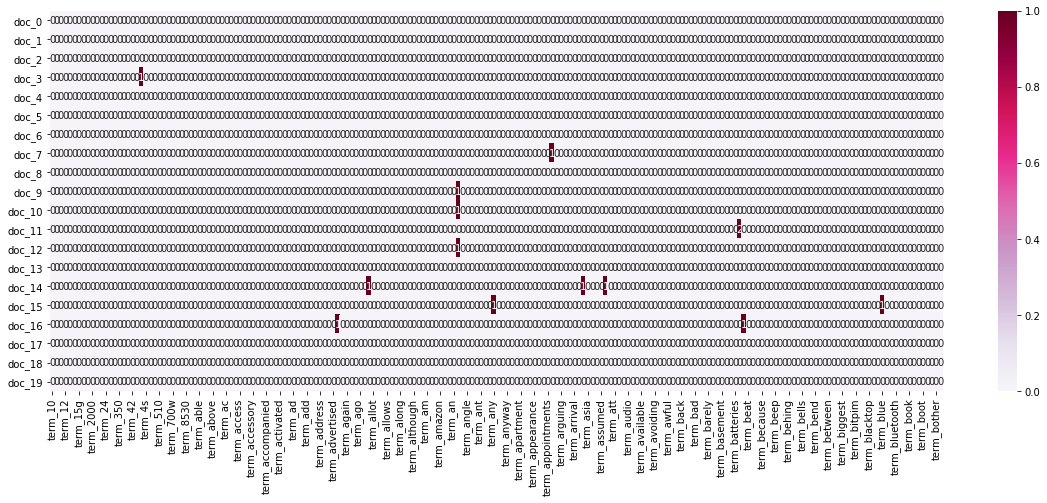

In [329]:
import seaborn as sns

df_todraw = pd.DataFrame(amazon_z, columns = amazon_x, index = amazon_y)
plt.subplots(figsize=(20, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

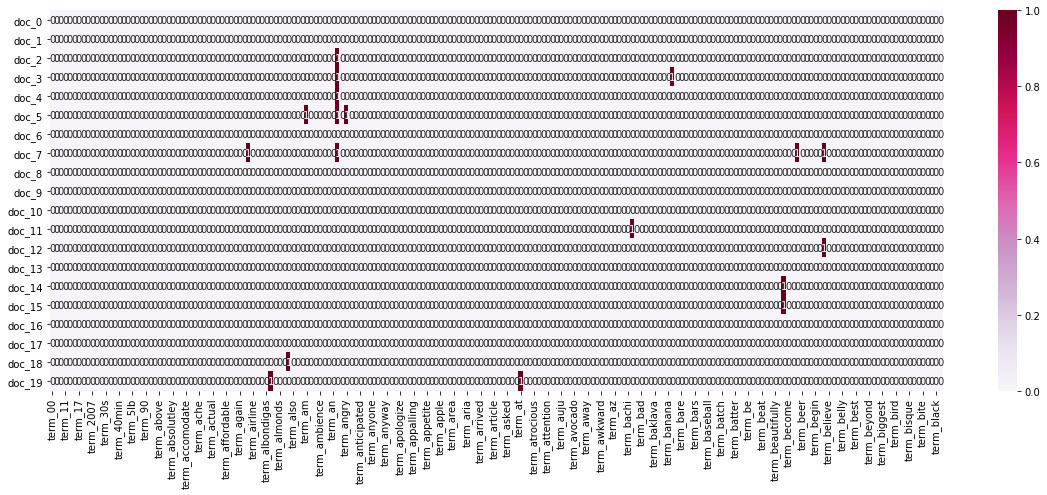

In [330]:
df_todraw = pd.DataFrame(yelp_z, columns = yelp_x, index = yelp_y)
plt.subplots(figsize=(20, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

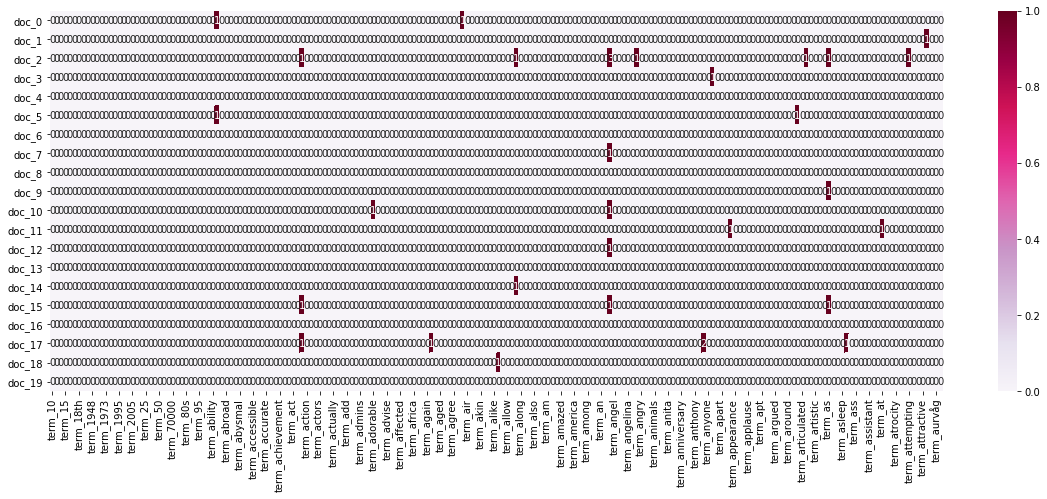

In [331]:
df_todraw = pd.DataFrame(imdb_z, columns = imdb_x, index = imdb_y)
plt.subplots(figsize=(20, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [332]:
from sklearn.decomposition import PCA

amazon_reduced = PCA(n_components = 2).fit_transform(amazon_counts.toarray())
yelp_reduced = PCA(n_components = 2).fit_transform(yelp_counts.toarray())
imdb_reduced = PCA(n_components = 2).fit_transform(imdb_counts.toarray())

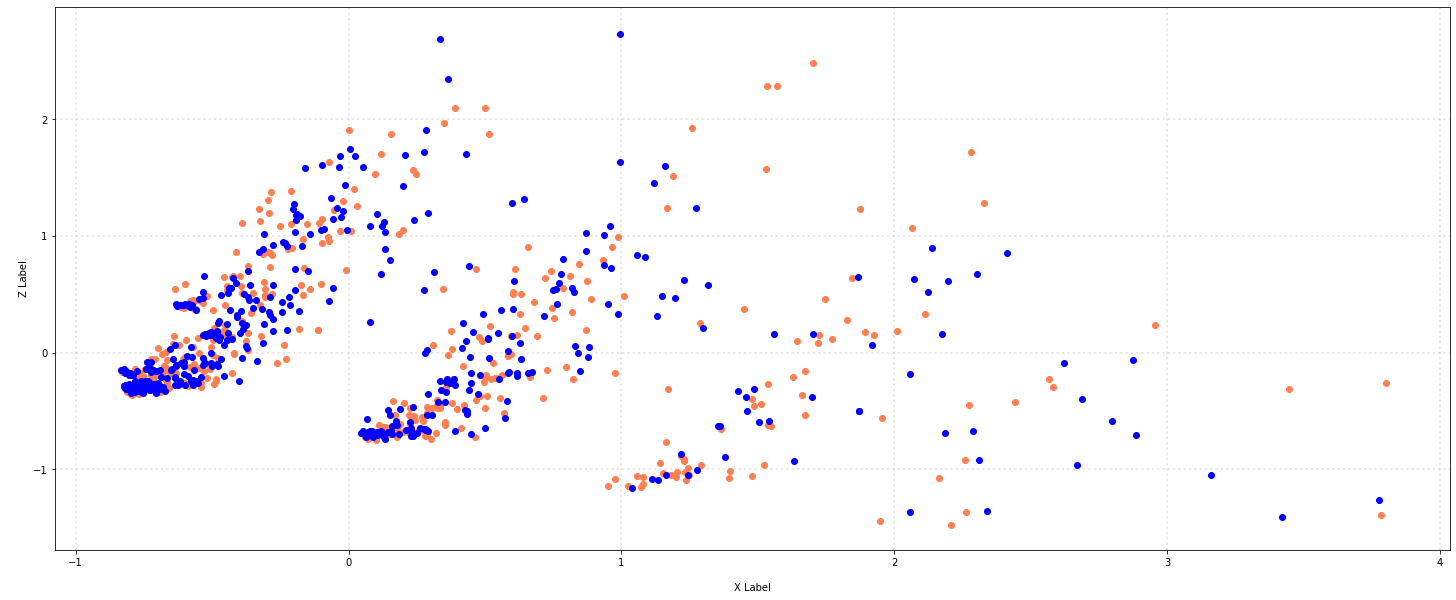

In [344]:
col = ['coral', 'blue']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, ["0","1"]):
    xs = amazon_reduced[amazon_pd['sentiment'] == category].T[0]
    ys = amazon_reduced[amazon_pd['sentiment'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_ylabel('\nZ Label')
#ax.legend(handles=[l1, l2], labels=['up', 'down'],  loc='best')

plt.show()

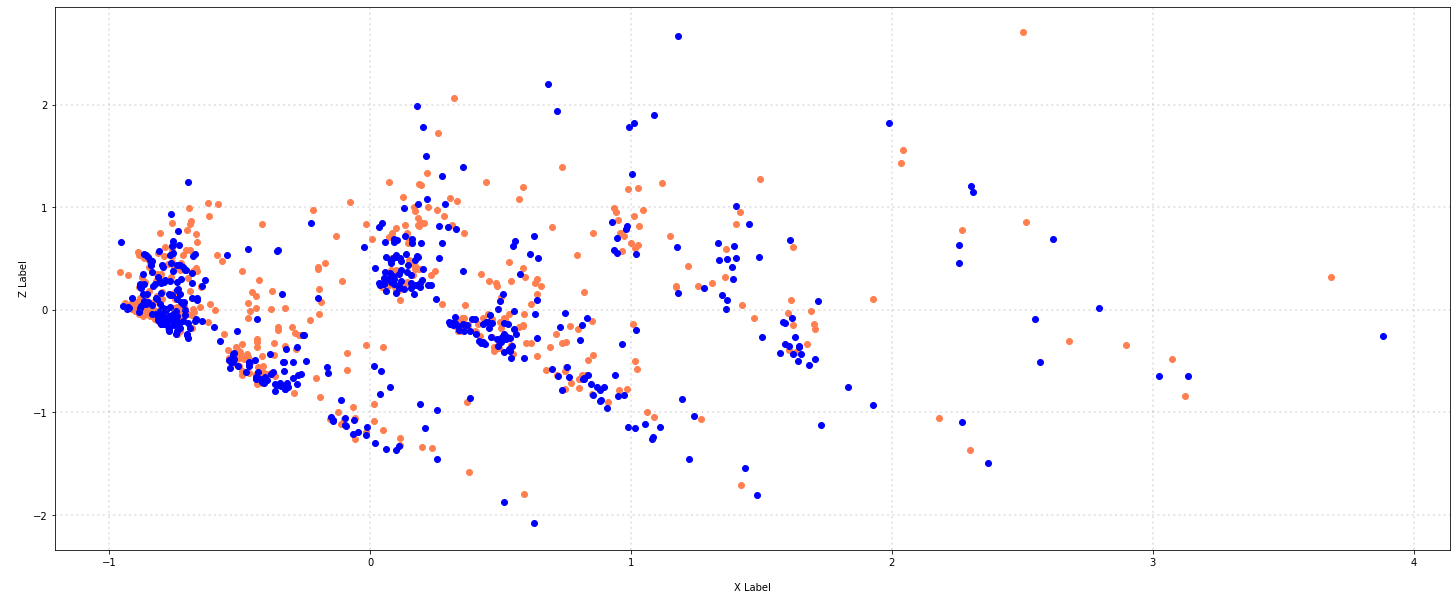

In [345]:
col = ['coral', 'blue']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, ["0","1"]):
    xs = yelp_reduced[yelp_pd['sentiment'] == category].T[0]
    ys = yelp_reduced[yelp_pd['sentiment'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_ylabel('\nZ Label')
#ax.legend(handles=[l1, l2], labels=['up', 'down'],  loc='best')

plt.show()

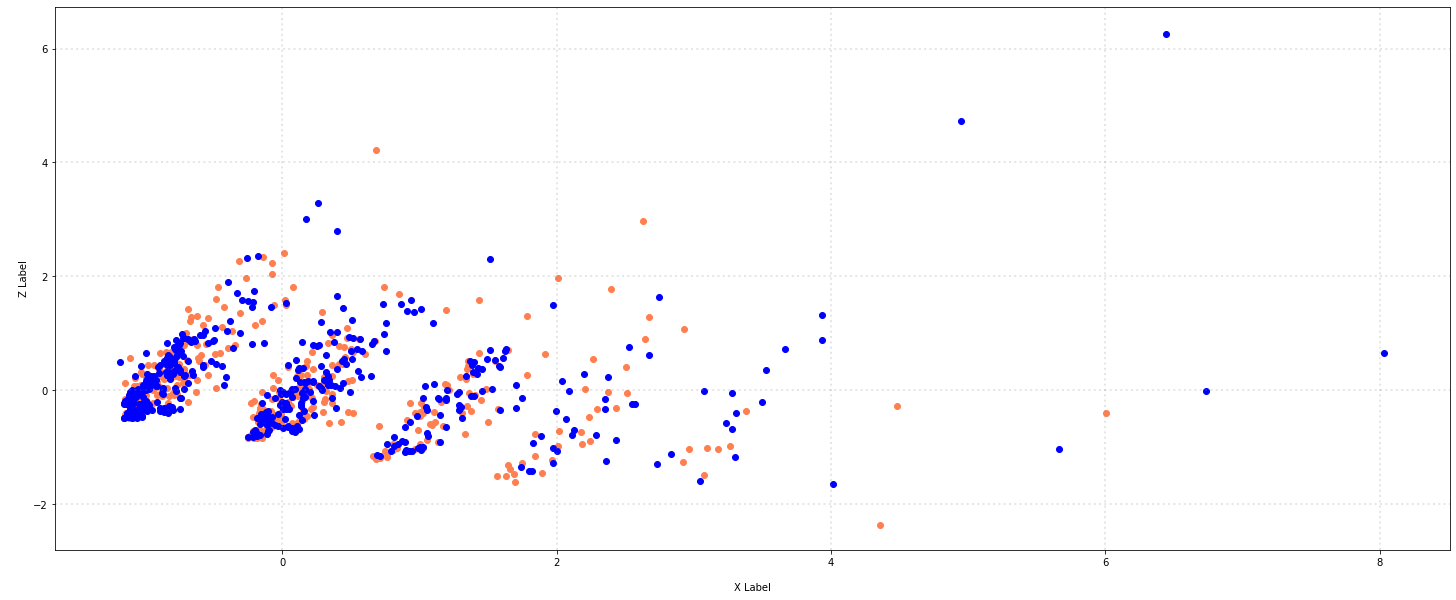

In [346]:
col = ['coral', 'blue']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, ["0","1"]):
    xs = imdb_reduced[imdb_pd['sentiment'] == category].T[0]
    ys = imdb_reduced[imdb_pd['sentiment'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_ylabel('\nZ Label')
#ax.legend(handles=[l1, l2], labels=['up', 'down'],  loc='best')

plt.show()

In [347]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(amazon_pd.sentiment)
mlb.classes_

array(['0', '1'], dtype='<U1')

In [348]:
amazon_pd['bin_sentiment'] = mlb.transform(amazon_pd['sentiment']).tolist()
amazon_pd[0:9]

,text,sentiment,unigrams,bin_sentiment
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]


In [351]:
import plotly.express as px

candidate = []
term_frequencies = []

count_vect = CountVectorizer()
amazon_pd_counts = count_vect.fit_transform(amazon_pd.text)

for j in range(0,amazon_pd_counts.shape[1]):
    if sum(amazon_pd_counts[:,j].toarray()) > 100:
        candidate.append(count_vect.get_feature_names()[j])
        term_frequencies.append(sum(amazon_pd_counts[:,j].toarray()))

fig = px.line(x=candidate, y=[list(i)[0] for i in term_frequencies], labels={'x':'word', 'y':'term_frequencies > 100'})
fig.show()

In [352]:
import plotly.express as px

candidate = []
term_frequencies = []

count_vect = CountVectorizer()
yelp_counts = count_vect.fit_transform(yelp_pd.text)

for j in range(0,yelp_pd_counts.shape[1]):
    if sum(yelp_pd_counts[:,j].toarray()) > 100:
        candidate.append(count_vect.get_feature_names()[j])
        term_frequencies.append(sum(yelp_pd_counts[:,j].toarray()))

fig = px.line(x=candidate, y=[list(i)[0] for i in term_frequencies], labels={'x':'word', 'y':'term_frequencies > 100'})
fig.show()

In [353]:
import plotly.express as px

candidate = []
term_frequencies = []

count_vect = CountVectorizer()
imdb_counts = count_vect.fit_transform(imdb_pd.text)

for j in range(0,imdb_pd_counts.shape[1]):
    if sum(imdb_pd_counts[:,j].toarray()) > 100:
        candidate.append(count_vect.get_feature_names()[j])
        term_frequencies.append(sum(imdb_pd_counts[:,j].toarray()))

fig = px.line(x=candidate, y=[list(i)[0] for i in term_frequencies], labels={'x':'word', 'y':'term_frequencies > 100'})
fig.show()

# Second Part - data exploration

In [355]:
# We retrieve 2 sentences for a random record, here, indexed at 50 and 100
document_to_transform_1 = []
random_record_1 = imdb_pd.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = imdb_pd.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = imdb_pd.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [356]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["I'm glad the film didn't go for the most obvious choice, as a lesser film certainly would have.  "]
["I don't think you will be disappointed.  "]
['I paid too much.  ']


In [357]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [358]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


# Third Part - new data visualizations

In [144]:
import matplotlib.pyplot as plt
%matplotlib inline

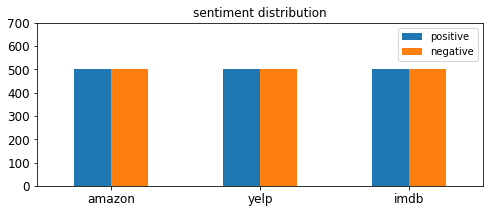

In [293]:
# Answer here
import pandas as pd

a = [len([x for x in amazon if "1" in x]),len([x for x in yelp if "1" in x]),len([x for x in imdb if "1" in x])]
b = [len([x for x in amazon if "0" in x]),len([x for x in yelp if "0" in x]),len([x for x in imdb if "0" in x])]

df = pd.DataFrame({'positive': a,
                    'negative': b}, index=["amazon","yelp","imdb"])
ax = df.plot.bar(title = 'sentiment distribution', ylim = [0, 700]
                 ,rot=0, fontsize = 12, figsize = (8,3))

In [146]:
import scipy as sp
from sklearn.feature_extraction.text import CountVectorizer

# ngram_range=(min, max), default: 1-gram => (1, 1)
count = CountVectorizer(ngram_range=(1, 1))

count.fit([x[0] for x in amazon])
BoW = count.vocabulary_
print('[amazon top 10 highest term frequency]\n')
for key in sorted(list(BoW.keys()),key = lambda i:BoW[i], reverse=True)[:10]:
    print('%s %d' % (key, BoW[key]))

[amazon top 10 highest term frequency]

zero 1846
z500a 1845
your 1844
you 1843
yet 1842
yes 1841
yell 1840
years 1839
year 1838
wrongly 1837


In [147]:
count.fit([x[0] for x in yelp])
BoW = count.vocabulary_
print('[yelp top 10 highest term frequency]\n')
for key in sorted(list(BoW.keys()),key = lambda i:BoW[i], reverse=True)[:10]:
    print('%s %d' % (key, BoW[key]))

[yelp top 10 highest term frequency]

zero 2034
yummy 2033
yum 2032
yukon 2031
yucky 2030
yourself 2029
your 2028
you 2027
yet 2026
yelpers 2025


In [148]:
count.fit([x[0] for x in imdb])
BoW = count.vocabulary_
print('[imdb top 10 highest term frequency]\n')
for key in sorted(list(BoW.keys()),key = lambda i:BoW[i], reverse=True)[:10]:
    print('%s %d' % (key, BoW[key]))

[imdb top 10 highest term frequency]

zombiez 3046
zombie 3045
zillion 3044
yun 3043
youtube 3042
youthful 3041
yourself 3040
your 3039
younger 3038
young 3037


In [149]:
total = []

count_a = CountVectorizer(ngram_range=(1, 1))
count_a.fit([x[0] for x in amazon])
BoW_a = count_a.vocabulary_

count_y = CountVectorizer(ngram_range=(1, 1))
count_y.fit([x[0] for x in yelp])
BoW_y = count_y.vocabulary_

count_i = CountVectorizer(ngram_range=(1, 1))
count_i.fit([x[0] for x in imdb])
BoW_i = count_i.vocabulary_

for word in sorted(list(BoW_a.keys()),key = lambda i:BoW_a[i], reverse=True)[:100]:
    if word in list(BoW_a.keys()) and word in list(BoW_y.keys()) and word in list(BoW_i.keys()):
        total.append(word)
for word in sorted(list(BoW_y.keys()),key = lambda i:BoW_y[i], reverse=True)[:100]:
    if word in list(BoW_a.keys()) and word in list(BoW_y.keys()) and word in list(BoW_i.keys()):
        total.append(word)
for word in sorted(list(BoW_i.keys()),key = lambda i:BoW_i[i], reverse=True)[:100]:
    if word in list(BoW_a.keys()) and word in list(BoW_y.keys()) and word in list(BoW_i.keys()):
        total.append(word)

In [150]:
total = list(set(total))

In [151]:
len(total)

50

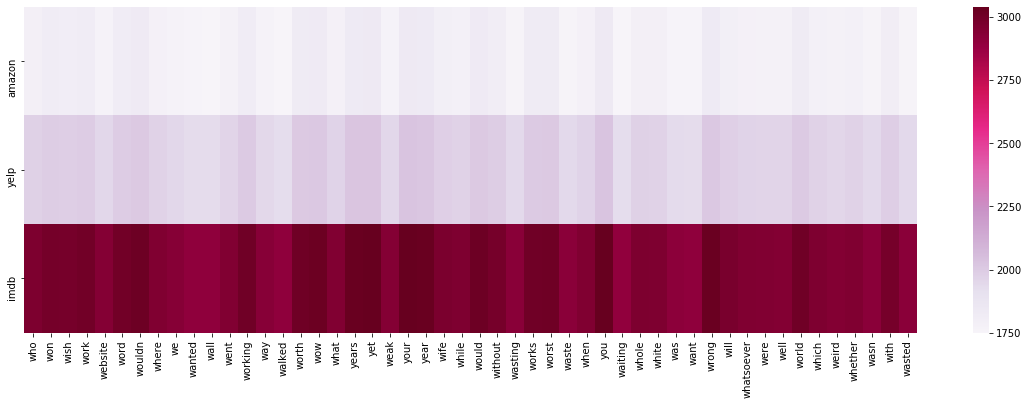

In [152]:
import seaborn as sns
plot_z = [[BoW_a[x] for x in total],[BoW_y[x] for x in total],[BoW_i[x] for x in total]]


df_todraw = pd.DataFrame(plot_z, columns = total, index = ["amazon","yelp","imdb"])
plt.subplots(figsize=(20, 6))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=min([*plot_z[0],*plot_z[1],*plot_z[2]]), vmax=max([*plot_z[0],*plot_z[1],*plot_z[2]]), annot=False)

In [271]:
total = []

count_a = CountVectorizer(ngram_range=(1, 1))
count_a.fit([x[0] for x in amazon if "1" in x])
BoW_a = count_a.vocabulary_

count_y = CountVectorizer(ngram_range=(1, 1))
count_y.fit([x[0] for x in yelp if "1" in x])
BoW_y = count_y.vocabulary_

count_i = CountVectorizer(ngram_range=(1, 1))
count_i.fit([x[0] for x in imdb if "1" in x])
BoW_i = count_i.vocabulary_

for word in sorted(list(BoW_a.keys()),key = lambda i:BoW_a[i], reverse=True)[:100]:
    if word in list(BoW_a.keys()) and word in list(BoW_y.keys()) and word in list(BoW_i.keys()):
        total.append(word)
for word in sorted(list(BoW_y.keys()),key = lambda i:BoW_y[i], reverse=True)[:100]:
    if word in list(BoW_a.keys()) and word in list(BoW_y.keys()) and word in list(BoW_i.keys()):
        total.append(word)
for word in sorted(list(BoW_i.keys()),key = lambda i:BoW_i[i], reverse=True)[:100]:
    if word in list(BoW_a.keys()) and word in list(BoW_y.keys()) and word in list(BoW_i.keys()):
        total.append(word)

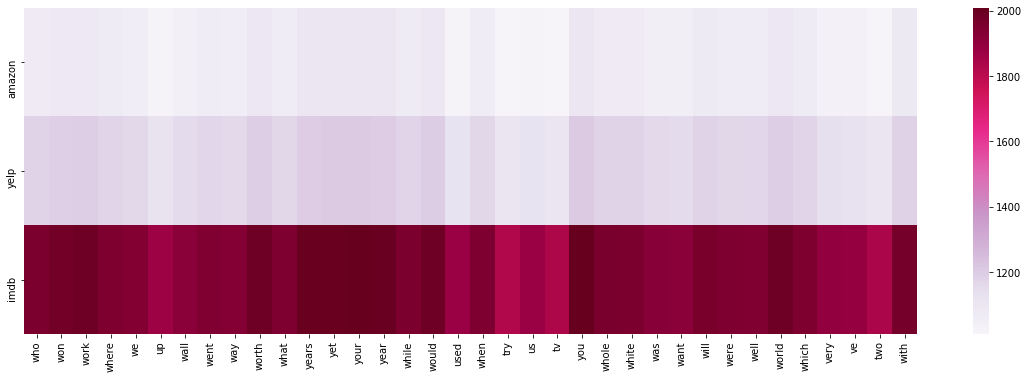

In [272]:
total = list(set(total))
plot_z = [[BoW_a[x] for x in total],[BoW_y[x] for x in total],[BoW_i[x] for x in total]]


df_todraw = pd.DataFrame(plot_z, columns = total, index = ["amazon","yelp","imdb"])
plt.subplots(figsize=(20, 6))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=min([*plot_z[0],*plot_z[1],*plot_z[2]]), vmax=max([*plot_z[0],*plot_z[1],*plot_z[2]]), annot=False)

In [273]:
total = []

count_a = CountVectorizer(ngram_range=(1, 1))
count_a.fit([x[0] for x in amazon if "0" in x])
BoW_a = count_a.vocabulary_

count_y = CountVectorizer(ngram_range=(1, 1))
count_y.fit([x[0] for x in yelp if "0" in x])
BoW_y = count_y.vocabulary_

count_i = CountVectorizer(ngram_range=(1, 1))
count_i.fit([x[0] for x in imdb if "0" in x])
BoW_i = count_i.vocabulary_

for word in sorted(list(BoW_a.keys()),key = lambda i:BoW_a[i], reverse=True)[:100]:
    if word in list(BoW_a.keys()) and word in list(BoW_y.keys()) and word in list(BoW_i.keys()):
        total.append(word)
for word in sorted(list(BoW_y.keys()),key = lambda i:BoW_y[i], reverse=True)[:100]:
    if word in list(BoW_a.keys()) and word in list(BoW_y.keys()) and word in list(BoW_i.keys()):
        total.append(word)
for word in sorted(list(BoW_i.keys()),key = lambda i:BoW_i[i], reverse=True)[:100]:
    if word in list(BoW_a.keys()) and word in list(BoW_y.keys()) and word in list(BoW_i.keys()):
        total.append(word)

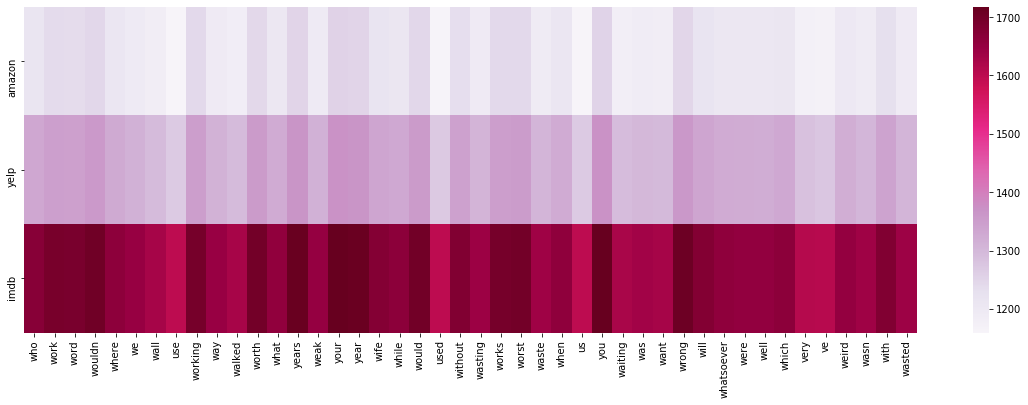

In [274]:
total = list(set(total))
plot_z = [[BoW_a[x] for x in total],[BoW_y[x] for x in total],[BoW_i[x] for x in total]]


df_todraw = pd.DataFrame(plot_z, columns = total, index = ["amazon","yelp","imdb"])
plt.subplots(figsize=(20, 6))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=min([*plot_z[0],*plot_z[1],*plot_z[2]]), vmax=max([*plot_z[0],*plot_z[1],*plot_z[2]]), annot=False)

# Third Part - TF-IDF features

In [161]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

tfidf = TfidfVectorizer(ngram_range=(1,1))
tfidf.fit([x[0] for x in amazon])

top = 10
# get idf score of vocabularies
idf = tfidf.idf_
print("[amazon]\n")
print('[vocabularies with smallest idf scores]')
sorted_idx = idf.argsort()
for i in range(top):
    print('%s: %.2f' % (tfidf.get_feature_names()[sorted_idx[i]], idf[sorted_idx[i]]))

doc_tfidf_a = tfidf.transform([x[0] for x in amazon]).toarray()
tfidf_sum = np.sum(doc_tfidf_a, axis=0)
print("\n[vocabularies with highest tf-idf scores]")
for tok, v in zip(tfidf.inverse_transform(np.ones(tfidf_sum.shape[0]))[0][tfidf_sum.argsort()[::-1]][:top], 
                  np.sort(tfidf_sum)[::-1][:top]):
    print('%s: %.2f' % (tok, v))

[amazon]

[vocabularies with smallest idf scores]
the: 1.98
and: 2.30
it: 2.35
is: 2.56
this: 2.60
to: 2.78
phone: 2.83
my: 3.10
of: 3.17
for: 3.17

[vocabularies with highest tf-idf scores]
the: 58.93
it: 45.86
and: 40.52
is: 39.28
this: 37.23
great: 34.32
phone: 33.78
to: 29.71
very: 26.14
not: 24.50


In [162]:
tfidf = TfidfVectorizer(ngram_range=(1,1))
tfidf.fit([x[0] for x in yelp])

top = 10
# get idf score of vocabularies
idf = tfidf.idf_
print("[yelp]\n")
print('[vocabularies with smallest idf scores]')
sorted_idx = idf.argsort()
for i in range(top):
    print('%s: %.2f' % (tfidf.get_feature_names()[sorted_idx[i]], idf[sorted_idx[i]]))

doc_tfidf_y = tfidf.transform([x[0] for x in amazon]).toarray()
tfidf_sum = np.sum(doc_tfidf_y, axis=0)
print("\n[vocabularies with highest tf-idf scores]")
for tok, v in zip(tfidf.inverse_transform(np.ones(tfidf_sum.shape[0]))[0][tfidf_sum.argsort()[::-1]][:top], 
                  np.sort(tfidf_sum)[::-1][:top]):
    print('%s: %.2f' % (tok, v))

[yelp]

[vocabularies with smallest idf scores]
the: 1.80
and: 2.09
was: 2.34
to: 2.70
is: 2.88
it: 2.98
this: 3.00
of: 3.10
food: 3.10
not: 3.18

[vocabularies with highest tf-idf scores]
the: 69.13
it: 68.01
is: 56.93
this: 51.07
and: 45.01
great: 44.95
very: 35.94
to: 35.43
my: 35.28
with: 30.75


In [172]:
tfidf = TfidfVectorizer(ngram_range=(1,1))
tfidf.fit([x[0] for x in imdb])

top = 10
# get idf score of vocabularies
idf = tfidf.idf_
print("[imdb]\n")
print('[vocabularies with smallest idf scores]')
sorted_idx = idf.argsort()
for i in range(top):
    print('%s: %.2f' % (tfidf.get_feature_names()[sorted_idx[i]], idf[sorted_idx[i]]))

doc_tfidf_i = tfidf.transform([x[0] for x in amazon]).toarray()
tfidf_sum = np.sum(doc_tfidf_i, axis=0)
print("\n[vocabularies with highest tf-idf scores]")
for tok, v in zip(tfidf.inverse_transform(np.ones(tfidf_sum.shape[0]))[0][tfidf_sum.argsort()[::-1]][:top], 
                  np.sort(tfidf_sum)[::-1][:top]):
    print('%s: %.2f' % (tok, v))

[imdb]

[vocabularies with smallest idf scores]
the: 1.67
and: 2.09
of: 2.18
is: 2.22
it: 2.30
this: 2.30
to: 2.52
in: 2.68
movie: 2.76
was: 2.81

[vocabularies with highest tf-idf scores]
the: 64.91
it: 51.65
great: 47.10
and: 44.78
is: 43.70
my: 41.00
this: 38.70
very: 34.75
not: 33.10
to: 31.93


# Third Part - Naive Bayes classifier

In [187]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
amazon_counts = count_vect.fit_transform([x[0] for x in amazon])
print(amazon_counts.toarray().shape)
print(doc_tfidf_a.shape)

(1000, 1847)
(1000, 1847)


In [188]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
amazon_counts = count_vect.fit_transform([x[0] for x in amazon])

print("[amazon tf] naive bayes classifier")
X_train, X_test, Y_train, Y_test = train_test_split(amazon_counts.toarray(), [int(x[1]) for x in amazon], test_size=0.25)
bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
print(bnb.score(X_test, Y_test))

print("---------------------------\n")

print("[amazon tf-idf] naive bayes classifier")
X_train, X_test, Y_train, Y_test = train_test_split(doc_tfidf_a, [int(x[1]) for x in amazon], test_size=0.25)
bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
print(bnb.score(X_test, Y_test))

[amazon tf] naive bayes classifier
0.82
---------------------------

[amazon tf-idf] naive bayes classifier
0.744


In [189]:
count_vect = CountVectorizer()
yelp_counts = count_vect.fit_transform([x[0] for x in yelp])

print("[yelp tf] naive bayes classifier")
X_train, X_test, Y_train, Y_test = train_test_split(yelp_counts.toarray(), [int(x[1]) for x in yelp], test_size=0.25)
bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
print(bnb.score(X_test, Y_test))

print("---------------------------\n")

print("[yelp tf-idf] naive bayes classifier")
X_train, X_test, Y_train, Y_test = train_test_split(doc_tfidf_y, [int(x[1]) for x in yelp], test_size=0.25)
bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
print(bnb.score(X_test, Y_test))

[yelp tf] naive bayes classifier
0.76
---------------------------

[yelp tf-idf] naive bayes classifier
0.56


In [190]:
count_vect = CountVectorizer()
imdb_counts = count_vect.fit_transform([x[0] for x in imdb])

print("[imdb tf] naive bayes classifier")
X_train, X_test, Y_train, Y_test = train_test_split(imdb_counts.toarray(), [int(x[1]) for x in imdb], test_size=0.25)
bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
print(bnb.score(X_test, Y_test))

print("---------------------------\n")

print("[imdb tf-idf] naive bayes classifier")
X_train, X_test, Y_train, Y_test = train_test_split(doc_tfidf_i, [int(x[1]) for x in imdb], test_size=0.25)
bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
print(bnb.score(X_test, Y_test))

[imdb tf] naive bayes classifier
0.788
---------------------------

[imdb tf-idf] naive bayes classifier
0.512


comment:
    
It's obviously that classifier trained with term frequency outperforms the one with tf-idf. In my opinion, if we wanna categorize a text as good comment, we usually find the key words like "good", "wondweful" and so on. Those words usually come along in texts, but tf-idf try to lower the importance of these words because of high frequency of usage inter-textually. So a model trained with term frequency works better. 

# Fourth Part

There are some parts inefficient like data visualization and preparation. Sine there are thousands of words in the dataset, it's extremely inefficient to take care of all words. And it's also meaningless to show all the visualization of all words. So it's suggested to remove some rare words. Before doing that, doing the statistics is necessary and we also can remove the punctations which don't imply so much meaning. After the preprocessing is done properly, the quantity of dataset may be lowered without losing significent information. Besides, the appoarch for dimensionality reduction can adpot LDA(Linear Discriminant Analysis) wihich belongs to supervised learning and LDA may help more than PCA(unsupervised learning).